In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

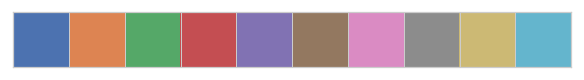

In [2]:
sns.set(style="whitegrid")
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [3]:
def process_data(*path, show_plot=False, plot_title='Spectrogram'):
    data = pd.DataFrame()
    for i in path:
        data_i = pd.read_csv(os.path.join(root, i), index_col='Unnamed: 0')
        if 'GPU' in i:
            data_i['Type']='nnAudio GPU'
        elif 'CPU' in i:
            data_i['Type']='nnAudio'
        else:
            pass
        data = data.append(data_i) 
    
        
    result_avg = data.groupby('Type').mean()
    result_std = data.groupby('Type').std()
    
    if show_plot:
        sns.set(style="whitegrid")
        ax = sns.barplot(x="Type", y="t_avg", data=data)
        plt.title(plot_title, size=20)
        plt.ylabel('', size=16)
        plt.xlabel('', size=16)
        ax.tick_params(labelsize=14)
        ax.set_yscale('log')
        plt.ylim(1e-3,150)
        counter = 0
        for p in ax.patches: 
            if counter == 2:
                ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), 
                    ha = 'center', va = 'center', xytext = (20, 10), 
                    textcoords = 'offset points')
            else:
                ax.annotate(format(p.get_height(), '.3f'), 
                               (p.get_x() + p.get_width() / 2., 
                                p.get_height()), 
                                ha = 'center', va = 'center', xytext = (0, 10), 
                                textcoords = 'offset points')
            counter+=1        

    return result_avg, result_std

def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

In [4]:
def plot_device_result(device_name, root):
    STFT_result_avg, STFT_result_std = process_data('librosa_Spec', 'Spec_torch_CPU', 'Spec_torch_GPU')
    Mel_result_avg, Mel_result_std = process_data('librosa_Mel', 'Mel_torch_CPU', 'Mel_torch_GPU')
    CQT_result_avg, CQT_result_std = process_data('librosa_CQT', 'CQT2010v1_torch_CPU', 'CQT2010v1_torch_GPU')
    CQT2010v2_result_avg, CQT2010v2_result_std = process_data('librosa_CQT', 'CQT2010_torch_CPU', 'CQT2010_torch_GPU')
    CQT1992_result_avg, CQT1992_result_std = process_data('librosa_CQT', 'CQT1992_torch_CPU', 'CQT1992_torch_GPU')
    
    
    final_data_avg = STFT_result_avg.append([Mel_result_avg, CQT_result_avg])
    grouped_data_avg = final_data_avg.groupby(final_data_avg.index)

    labels = ['STFT', 'MelSpec', 'CQT2010']
    librosa_means = grouped_data_avg.get_group('librosa').values.reshape(-1)
    CPU_means = grouped_data_avg.get_group('nnAudio').values.reshape(-1)
    GPU_means = grouped_data_avg.get_group('nnAudio GPU').values.reshape(-1)

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize=((8,4)))
    rects1 = ax.bar(x - width, librosa_means, width, label='librosa')
    rects2 = ax.bar(x, CPU_means, width, label='nnAudio CPU')
    rects3 = ax.bar(x + width, GPU_means, width, label='nnAudio GPU')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time in seconds', size=16)
    ax.set_title(device_name, size=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, size=16)
    ax.legend(loc='upper left')
    ax.set_yscale('log')
    ax.set_ylim(6e-4,1000)

    autolabel(ax, rects1)
    autolabel(ax, rects2)
    autolabel(ax, rects3)
    ax.tick_params(labelsize=16)
    fig.tight_layout()
    plt.show()    
    
    
    
    final_data_avg = CQT_result_avg.append([CQT2010v2_result_avg, CQT1992_result_avg])
    final_data_avg.drop('librosa', inplace=True)
    grouped_data_avg = final_data_avg.groupby(final_data_avg.index)

    labels = ['CQT2010', 'CQT2010v2', 'CQT1992v2']
    CPU_means = grouped_data_avg.get_group('nnAudio').values.reshape(-1)
    GPU_means = grouped_data_avg.get_group('nnAudio GPU').values.reshape(-1)

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize=((8,4)))
    rects2 = ax.bar(x-width/2, CPU_means, width, label='nnAudio CPU', color='C1')
    rects3 = ax.bar(x+width/2, GPU_means, width, label='nnAudio GPU', color='C2')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time in seconds', size=16)
    # ax.set_title('Computation Time (Idle)', size=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, size=16)
    ax.legend(loc='upper left')#, bbox_to_anchor=(0.15, 1))
    ax.set_yscale('log')
    ax.set_ylim(6e-4,1000)
    ax.set_title(device_name, size=20)


    autolabel(ax, rects2)
    autolabel(ax, rects3)
    ax.tick_params(labelsize=16)
    fig.tight_layout()
    plt.show()    

In [5]:
# Configuration
# i7 8700
# RAM 16GB
# NVIDIA GeForce GTX 1070 Ti

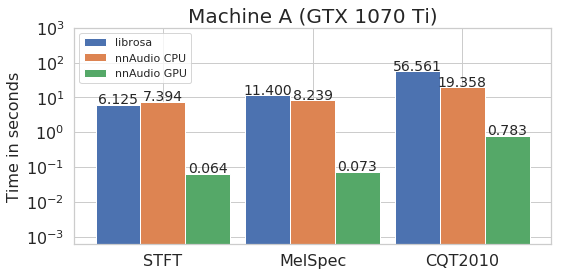

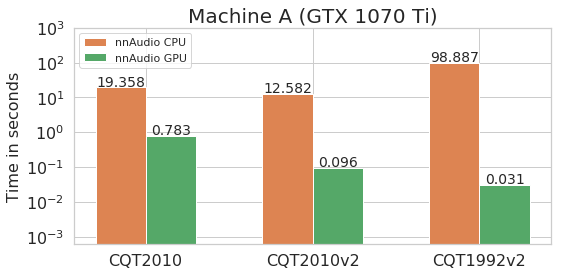

In [6]:
root = './GTX1070Ti/'
plot_device_result('Machine A (GTX 1070 Ti)', root)

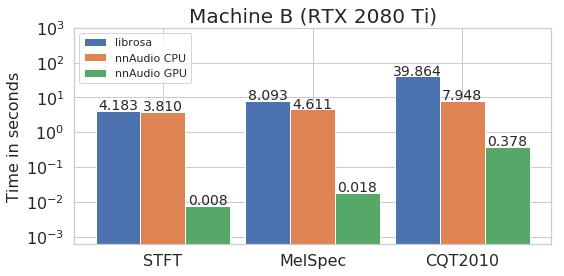

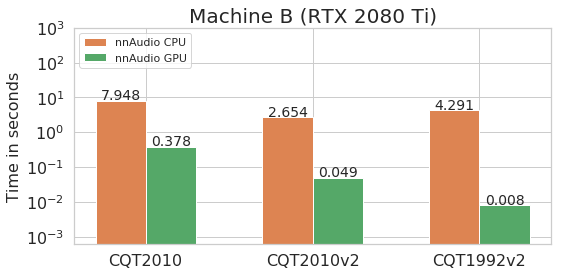

In [7]:
root = './RTX2080Ti/'
plot_device_result('Machine B (RTX 2080 Ti)', root)

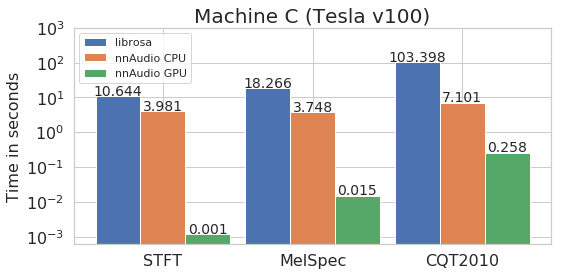

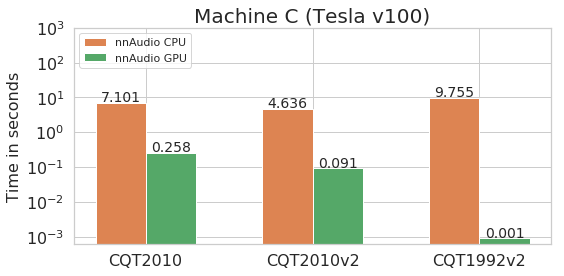

In [8]:
root = './DGX/'
plot_device_result('Machine C (Tesla v100)', root)

In [9]:
root = './RTX2080Ti/'

In [10]:
def plot_cross_platform(device_name, root, anchor):
    def process_data2(*path, show_plot=False, plot_title='Spectrogram'):
        data = pd.DataFrame()
        type_list = ['Kapre GPU', 'torchaudio', 'nnAudio GPU']
        for idx, i in enumerate(path):
            data_i = pd.read_csv(os.path.join(root, i), index_col='Unnamed: 0')
            data_i['Type'] = type_list[idx]

            data = data.append(data_i) 


        result_avg = data.groupby('Type').mean()
        result_std = data.groupby('Type').std()

        if show_plot:
            sns.set(style="whitegrid")
            ax = sns.barplot(x="Type", y="t_avg", data=data)
            plt.title(plot_title, size=20)
            plt.ylabel('', size=16)
            plt.xlabel('', size=16)
            ax.tick_params(labelsize=14)
            ax.set_yscale('log')
            plt.ylim(1e-3,150)
            counter = 0
            for p in ax.patches: 
                if counter == 2:
                    ax.annotate(format(p.get_height(), '.3f'), 
                       (p.get_x() + p.get_width() / 2., 
                        p.get_height()), 
                        ha = 'center', va = 'center', xytext = (20, 10), 
                        textcoords = 'offset points')
                else:
                    ax.annotate(format(p.get_height(), '.3f'), 
                                   (p.get_x() + p.get_width() / 2., 
                                    p.get_height()), 
                                    ha = 'center', va = 'center', xytext = (0, 10), 
                                    textcoords = 'offset points')
                counter+=1        

        return result_avg, result_std

    def autolabel(ax, rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -2),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=14)    
    
    STFT_result_avg, STFT_result_std = process_data2('kapre_Spec', 'Spec_torchaudio_GPU', 'Spec_torch_GPU')
    Mel_result_avg, Mel_result_std = process_data2('Mel_kapre_GPU', 'Mel_torchaudio_GPU', 'Mel_torch_GPU')
    CQT_result_avg, CQT_result_std = process_data2('librosa_CQT', 'CQT2010v1_torch_CPU', 'CQT2010v1_torch_GPU') 
    
    CQT_result_avg.loc['Kapre GPU'] = 0
    CQT_result_avg.loc['torchaudio'] = 0
    
    final_data_avg = STFT_result_avg.append([Mel_result_avg, CQT_result_avg])
    grouped_data_avg = final_data_avg.groupby(final_data_avg.index)

    labels = ['STFT', 'MelSpec', 'CQT2010']
    librosa_means = grouped_data_avg.get_group('Kapre GPU').values.reshape(-1)
    CPU_means = grouped_data_avg.get_group('torchaudio').values.reshape(-1)
    GPU_means = grouped_data_avg.get_group('nnAudio GPU').values.reshape(-1)

    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars

    fig, ax = plt.subplots(figsize=((8,4)))
    rects1 = ax.bar(x - width, librosa_means, width, label='Kapre GPU', color=current_palette[3])
    rects2 = ax.bar(x, CPU_means, width, label='torchaudio GPU', color=current_palette[4])
    rects3 = ax.bar(x + width, GPU_means, width, label='nnAudio GPU', color=current_palette[2])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time in seconds', size=16)
    # ax.set_title('Computation Time (Idle)', size=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, size=16)
    ax.legend(loc='upper right', bbox_to_anchor=anchor)
    ax.set_yscale('log')
    ax.set_ylim(1e-4,10)
    ax.set_title(device_name, size=20)


    def autolabel(rects, hoff=0):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            if height == 0:
                pass
            else:
                ax.annotate('{:.4f}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height+hoff),
                            xytext=(0, -2),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=12)


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3, hoff=1e-4)

    ax.tick_params(labelsize=16)

    fig.tight_layout()

    plt.show()
    
def plot_cross_platform_v2(device_name, root, anchor):
    def process_data2(*path, show_plot=False, plot_title='Spectrogram'):
        data = pd.DataFrame()
        type_list = ['Kapre GPU', 'tensorflow', 'torchaudio', 'nnAudio GPU']
        for idx, i in enumerate(path):
            data_i = pd.read_csv(os.path.join(root, i), index_col='Unnamed: 0')
            data_i['Type'] = type_list[idx]

            data = data.append(data_i) 


        result_avg = data.groupby('Type').mean()
        result_std = data.groupby('Type').std()

        if show_plot:
            sns.set(style="whitegrid")
            ax = sns.barplot(x="Type", y="t_avg", data=data)
            plt.title(plot_title, size=20)
            plt.ylabel('', size=16)
            plt.xlabel('', size=16)
            ax.tick_params(labelsize=14)
            ax.set_yscale('log')
            plt.ylim(1e-3,150)
            counter = 0
            for p in ax.patches: 
                if counter == 2:
                    ax.annotate(format(p.get_height(), '.3f'), 
                       (p.get_x() + p.get_width() / 2., 
                        p.get_height()), 
                        ha = 'center', va = 'center', xytext = (20, 10), 
                        textcoords = 'offset points')
                else:
                    ax.annotate(format(p.get_height(), '.3f'), 
                                   (p.get_x() + p.get_width() / 2., 
                                    p.get_height()), 
                                    ha = 'center', va = 'center', xytext = (0, 10), 
                                    textcoords = 'offset points')
                counter+=1        

        return result_avg, result_std

    def autolabel(ax, rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, -2),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=14)    
    
    STFT_result_avg, STFT_result_std = process_data2('kapre_Spec', 'Spec_tensorflow_GPU', 'Spec_torchaudio_GPU', 'Spec_torch_GPU')
    Mel_result_avg, Mel_result_std = process_data2('Mel_kapre_GPU', 'Mel_tensorflow_GPU','Mel_torchaudio_GPU', 'Mel_torch_GPU')
    CQT_result_avg, CQT_result_std = process_data2('librosa_CQT', 'CQT2010v1_torch_CPU', 'CQT2010v1_torch_CPU', 'CQT2010v1_torch_GPU') 
    
    CQT_result_avg.loc['Kapre GPU'] = 0
    CQT_result_avg.loc['tensorflow'] = 0
    CQT_result_avg.loc['torchaudio'] = 0
    
    final_data_avg = STFT_result_avg.append([Mel_result_avg, CQT_result_avg])
    grouped_data_avg = final_data_avg.groupby(final_data_avg.index)

    labels = ['STFT', 'MelSpec', 'CQT2010']
    Kapre = grouped_data_avg.get_group('Kapre GPU').values.reshape(-1)
    tensorflow = grouped_data_avg.get_group('tensorflow').values.reshape(-1)
    torchaudio = grouped_data_avg.get_group('torchaudio').values.reshape(-1)
    nnAudio = grouped_data_avg.get_group('nnAudio GPU').values.reshape(-1)
    
    print(tensorflow)

    x = np.arange(len(labels))  # the label locations
    width = 0.23  # the width of the bars

    fig, ax = plt.subplots(figsize=((8,4)))
    rects1 = ax.bar(x - 1.5*width, Kapre, width, label='Kapre GPU', color=current_palette[3])
    rects1b = ax.bar(x - 0.5*width, tensorflow, width, label='tf.signal GPU', color=current_palette[5])
    rects2 = ax.bar(x + 0.5*width, torchaudio, width, label='torchaudio GPU', color=current_palette[4])
    rects3 = ax.bar(x + 1.5*width, nnAudio, width, label='nnAudio GPU', color=current_palette[2])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time in seconds', size=16)
    # ax.set_title('Computation Time (Idle)', size=20)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, size=16)
    ax.legend(loc='upper right', bbox_to_anchor=anchor)
    ax.set_yscale('log')
    ax.set_ylim(1e-4,10)
    ax.set_title(device_name, size=20)


    def autolabel(rects, hoff=0):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            if height == 0:
                pass
            else:
                ax.annotate('{:.3f}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height+hoff),
                            xytext=(0, -2),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize=12)


    autolabel(rects1)
    autolabel(rects1b)
    autolabel(rects2)
    autolabel(rects3, hoff=1e-4)

    ax.tick_params(labelsize=16)

    fig.tight_layout()

    plt.show()

[0.85046425 0.57717785 0.        ]


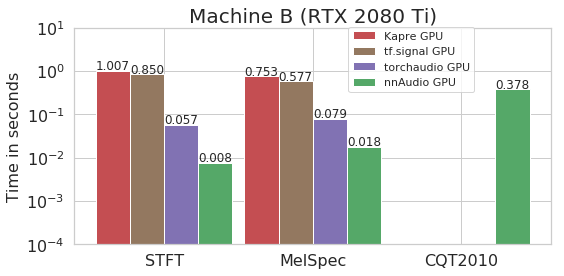

In [17]:
plot_cross_platform_v2('Machine B (RTX 2080 Ti)', './RTX2080Ti/', (0.85,1.03))

[1.05083078 1.02395933 0.        ]


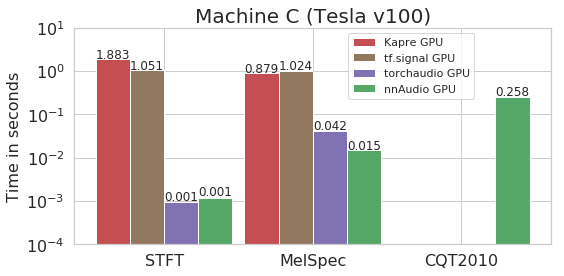

In [12]:
plot_cross_platform_v2('Machine C (Tesla v100)', './DGX/', (0.85,1))

[0.61100038 0.55654186 0.        ]


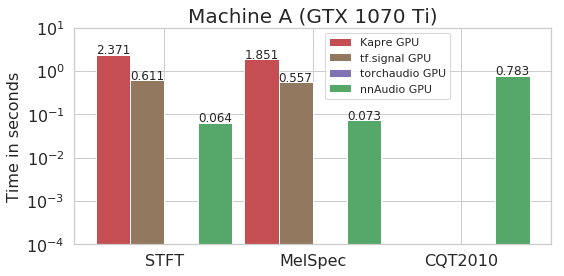

In [13]:
plot_cross_platform_v2('Machine A (GTX 1070 Ti)', './GTX1070Ti/', (0.8,1))